In [1]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [2]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [4]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [10]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [6]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 21s 71ms/step - loss: 1.5312 - accuracy: 0.5081 - val_loss: 0.7154 - val_accuracy: 0.8313
Epoch 2/10
155/155 [==============================] - 11s 69ms/step - loss: 0.6673 - accuracy: 0.7496 - val_loss: 0.5009 - val_accuracy: 0.8098
Epoch 3/10
155/155 [==============================] - 10s 62ms/step - loss: 0.4140 - accuracy: 0.8683 - val_loss: 0.2838 - val_accuracy: 0.8988
Epoch 4/10
155/155 [==============================] - 11s 69ms/step - loss: 0.2647 - accuracy: 0.9265 - val_loss: 0.2706 - val_accuracy: 0.9233
Epoch 5/10
155/155 [==============================] - 11s 69ms/step - loss: 0.1766 - accuracy: 0.9523 - val_loss: 0.0596 - val_accuracy: 0.9939
Epoch 6/10
155/155 [==============================] - 11s 69ms/step - loss: 0.1157 - accuracy: 0.9798 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 7/10
155/155 [==============================] - 10s 63ms/step - loss: 0.0763 - accuracy: 0.9863 - val_loss: 0.0215 - val_accuracy:

In [13]:
model.save('animalWeights.h5')

In [14]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img('/content/elephant-1024x691.jpg',target_size=(120,120))

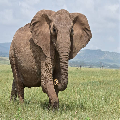

In [21]:
img

In [22]:
img = image.img_to_array(img)
img

array([[[203., 213., 225.],
        [201., 211., 223.],
        [200., 210., 222.],
        ...,
        [192., 204., 220.],
        [196., 208., 224.],
        [205., 217., 233.]],

       [[202., 212., 224.],
        [202., 212., 224.],
        [202., 212., 224.],
        ...,
        [190., 202., 218.],
        [192., 204., 220.],
        [201., 213., 229.]],

       [[199., 209., 221.],
        [199., 209., 221.],
        [199., 209., 221.],
        ...,
        [195., 207., 223.],
        [192., 204., 220.],
        [201., 213., 229.]],

       ...,

       [[122., 133.,  90.],
        [172., 175., 132.],
        [157., 155., 106.],
        ...,
        [190., 192., 145.],
        [133., 133.,  79.],
        [154., 153., 109.]],

       [[221., 213., 174.],
        [143., 139.,  91.],
        [190., 187., 142.],
        ...,
        [203., 205., 158.],
        [136., 142.,  80.],
        [219., 221., 181.]],

       [[196., 200., 167.],
        [134., 139.,  85.],
        [186., 1

In [23]:
img = np.expand_dims(img,axis=0)
img

array([[[[203., 213., 225.],
         [201., 211., 223.],
         [200., 210., 222.],
         ...,
         [192., 204., 220.],
         [196., 208., 224.],
         [205., 217., 233.]],

        [[202., 212., 224.],
         [202., 212., 224.],
         [202., 212., 224.],
         ...,
         [190., 202., 218.],
         [192., 204., 220.],
         [201., 213., 229.]],

        [[199., 209., 221.],
         [199., 209., 221.],
         [199., 209., 221.],
         ...,
         [195., 207., 223.],
         [192., 204., 220.],
         [201., 213., 229.]],

        ...,

        [[122., 133.,  90.],
         [172., 175., 132.],
         [157., 155., 106.],
         ...,
         [190., 192., 145.],
         [133., 133.,  79.],
         [154., 153., 109.]],

        [[221., 213., 174.],
         [143., 139.,  91.],
         [190., 187., 142.],
         ...,
         [203., 205., 158.],
         [136., 142.,  80.],
         [219., 221., 181.]],

        [[196., 200., 167.],
       

In [25]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 31ms/step


2